In [145]:
print('ACIT 4610, Portfolio-2024')
print('\nGroup-13')
print('\nparticipate: Thomas, M khan, Harith')

ACIT 4610, Portfolio-2024

Group-13

participate: Thomas, M khan, Harith


Problem 1: Traffic Management Optimization Using Multi-Objective Evolutionary 
Algorithms.

Objective: 
Urban traffic management requires balancing multiple conflicting objectives, such as 
minimizing travel time, reducing fuel consumption, and minimizing air pollution. Your task is 
to apply a Multi-Objective Evolutionary Algorithm (MOEA) to optimize traffic management 
strategies for selected New York City (NYC) areas. The goal is to minimize conflicting 
objectives, Total Travel Time (TTT) and Fuel Consumption (FC), using real-world traffic data 
from NYC Open Data. 

Optimization Objectives: 
1. Minimize Total Travel Time (TTT): 
o Reduce the overall travel time for all vehicles within the network. 
2. Minimize Fuel Consumption (FC): 
o Reduce the total fuel consumption across the network, influenced by factors 
such as speed, acceleration, and traffic congestion. 

Data Source: 
The necessary data for this assignment can be accessed from the NYC Open Data portal: 
• NYC Traffic Volume Counts (2014-2022): NYC Open Data - Traffic Volume 
(https://data.cityofnewyork.us/Transportation/Traffic-Volume-Counts/btm5
ppia/about_data) 

• Traffic Speed Data: NYC Open Data -Traffic Speed
(https://data.cityofnewyork.us/Transportation/DOT-Traffic-Speeds-NBE/i4gi
tjb9/about_data) 

 
• Fuel Consumption Data: Estimated using empirical models based on traffic speed and 
volume. 

Problem Statement: 
You will focus on optimizing traffic management for the three to five road segments in New 
York City. For example: 
1. 5th Ave between 42nd St and 47th St (Manhattan) 
2. Atlantic Ave between Flatbush Ave and Bedford Ave (Brooklyn) 
3. Queens Blvd between Union Tpke and Yellowstone Blvd (Queens) 
4. Grand Concourse between E 161st St and E 170th St (Bronx) 
5. Victory Blvd between Richmond Ave and Clove Rd (Staten Island) 

The traffic management strategy involves controlling traffic signal timings (green, yellow, and 
red light durations) and setting speed limits on these segments. Your task is to develop an 
MOEA (discussed in lectures) that optimizes these parameters to achieve the best trade-off 
between minimizing TTT and FC. 


First step to run this project, is to install requirements python libraries.

In [146]:
print('Tools and Libraries:')
print('\n1- Python 3.')
print('\n2- OpenAI Gym for the environment.')
print('\n3- NumPy for numerical computations.')
print('\n3- pandas for data manipulation and analysis.')
print('\n3- requests for the process of sending and receiving data from websites.')
print('\n4- Matplotlib for plotting results.')
print('\n5- TensorFlow/PyTorch for more advanced RL algorithms like DQN.')
print('\n5- pymoo for for multi-objective optimization algorithms.')

!pip3 freeze
!pip3 install gym numpy tensorflow keras openAi matplotlib requests pandas gym deap pymoo

import sys
print('System version',sys.version)

Tools and Libraries:

1- Python 3.

2- OpenAI Gym for the environment.

3- NumPy for numerical computations.

3- pandas for data manipulation and analysis.

3- requests for the process of sending and receiving data from websites.

4- Matplotlib for plotting results.

5- TensorFlow/PyTorch for more advanced RL algorithms like DQN.

5- pymoo for for multi-objective optimization algorithms.
about-time==4.2.1
alive-progress==3.1.5
asttokens==2.4.1
autograd==1.7.0
certifi==2024.8.30
charset-normalizer==3.4.0
cma==3.2.2
colorama==0.4.6
comm==0.2.2
contourpy==1.3.0
cycler==0.12.1
deap==1.4.1
debugpy==1.8.7
decorator==5.1.1
Deprecated==1.2.14
dill==0.3.9
executing==2.1.0
fonttools==4.54.1
grapheme==0.6.0
idna==3.10
ipykernel==6.29.5
ipython==8.28.0
jedi==0.19.1
joblib==1.4.2
jupyter_client==8.6.3
jupyter_core==5.7.2
kiwisolver==1.4.7
matplotlib==3.9.2
matplotlib-inline==0.1.7
nest-asyncio==1.6.0
numpy==2.1.2
packaging==24.1
pandas==2.2.3
parso==0.8.4
pillow==11.0.0
platformdirs==4.3.6
prompt_t

ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for tensorflow


1. Data Exploration: 
A. Download and explore the NYC traffic volume and speed data for the selected 
road segments. 

Will focus on optimizing traffic management for the three to five road segments in New 
York City. For example: 
1. 5th Ave between 42nd St and 47th St (Manhattan) 
2. Atlantic Ave between Flatbush Ave and Bedford Ave (Brooklyn) 
3. Queens Blvd between Union Tpke and Yellowstone Blvd (Queens) 
4. Grand Concourse between E 161st St and E 170th St (Bronx) 
5. Victory Blvd between Richmond Ave and Clove Rd (Staten Island) 
The traffic management strategy involves controlling traffic signal timings (green, yellow, and 
red light durations) and setting speed limits on these segments. Your task is to develop an 
MOEA (discussed in lectures) that optimizes these parameters to achieve the best trade-off 
between minimizing TTT and FC.

In [62]:
# Define the dataset, and feching possible data using api
# 1. Average Speed of a Vehicle Traveled Between End Points dataset
# https://data.cityofnewyork.us/Transportation/DOT-Traffic-Speeds-NBE/i4gi-tjb9/data_preview

import requests
import pandas as pd

# Api key if neede
NYC_OPEN_DATA_API_KEY = 'br55d9sqptry35vxzglajqzfe'
NYC_OPEN_DATA_API_SecretKEY='4sk51l5by3uvyn516za8g2wen7cn1wokbry0e2ayfo1lugq6fl'

# API endpoint
Average_Speed_of_Vehicle_Traveled_Between_End_Points_url = "https://data.cityofnewyork.us/resource/i4gi-tjb9.json"

# Optional: Add parameters to limit the number of rows or filter data
params = {
    # "$limit": 1000,  # Fetch 1000 records.
}

# Fetch the data using a GET request
Average_Speed_response = requests.get(Average_Speed_of_Vehicle_Traveled_Between_End_Points_url, params=params)

# Check if the request was successful (status code 200)
if Average_Speed_response.status_code == 200:
    Average_Speed_of_Vehicle_Traveled_Between_End_Points_data = pd.DataFrame(Average_Speed_response.json())
    
    # Display the first few rows of the DataFrame
    print(Average_Speed_of_Vehicle_Traveled_Between_End_Points_data.head())
else:
    print(f"Error: {Average_Speed_response.status_code}")


    id  speed travel_time status               data_as_of  link_id  \
0  350      0           0   -101  2024-10-28T14:48:10.000  4616196   
1  222  18.01         373      0  2024-10-28T14:48:10.000  4616332   
2  425   5.59        1830   -101  2024-10-28T14:48:10.000  4616276   
3  351  35.41         152      0  2024-10-28T14:48:10.000  4616210   
4  261  22.36         188      0  2024-10-28T14:48:10.000  4616226   

                                         link_points  \
0  40.63092,-74.14592 40.62975,-74.14593 40.62877...   
1  40.7606904,-73.956791 40.7601606,-73.95751 40....   
2  40.67445,-73.80181 40.67374,-73.80154 40.67261...   
3  40.63092,-74.14592 40.62975,-74.14593 40.62877...   
4  40.61632,-74.0263 40.61928,-74.02375 40.623720...   

                                   encoded_poly_line  \
0  gv~vF~rpcMhF@bE[bDWbD@vCb@\\|D~@dCf@`Cv@jCjA~C...   
1  iaxwF\\|tkbMhBnCtChChGpEjGxE~CvBxEnGlGhFrA\\|A...   
2  ifgwFhlmaMlCu@`Fo@dJMrSp@`PfDnCd@pCk@\\|B_D^}D...   
3  gv~vF~rpcMhF@bE

In [64]:
# 2. Traffic Volume Count dataset
# https://data.cityofnewyork.us/Transportation/Traffic-Volume-Counts/btm5-ppia/data_preview

import requests
import pandas as pd

# Api key if neede
NYC_OPEN_DATA_API_KEY = 'br55d9sqptry35vxzglajqzfe'
NYC_OPEN_DATA_API_SecretKEY='4sk51l5by3uvyn516za8g2wen7cn1wokbry0e2ayfo1lugq6fl'

# API endpoint
Traffic_Volume_Count_url = "https://data.cityofnewyork.us/resource/btm5-ppia.json"

# Optional: Add parameters to limit the number of rows or filter data
params = {
    "$limit": 100000,  # Fetch 1000 records.
}

# Fetch the data using a GET request
Traffic_Volume_Count_response = requests.get(Traffic_Volume_Count_url, params=params)

# Check if the request was successful (status code 200)
if Traffic_Volume_Count_response.status_code == 200:
    Traffic_Volume_Count_data = pd.DataFrame(Traffic_Volume_Count_response.json())
    
    # Display the first few rows of the DataFrame
    print(Traffic_Volume_Count_data.head())
else:
    print(f"Error: {Traffic_Volume_Count_response.status_code}")


  id segmentid  roadway_name         from                to direction  \
0  1     15540  BEACH STREET  UNION PLACE  VAN DUZER STREET        NB   
1  2     15540  BEACH STREET  UNION PLACE  VAN DUZER STREET        NB   
2  3     15540  BEACH STREET  UNION PLACE  VAN DUZER STREET        NB   
3  4     15540  BEACH STREET  UNION PLACE  VAN DUZER STREET        NB   
4  5     15540  BEACH STREET  UNION PLACE  VAN DUZER STREET        NB   

                      date _12_00_1_00_am _1_00_2_00am _2_00_3_00am  ...  \
0  2012-01-09T00:00:00.000             20           10           11  ...   
1  2012-01-10T00:00:00.000             21           16            8  ...   
2  2012-01-11T00:00:00.000             27           14            6  ...   
3  2012-01-12T00:00:00.000             22            7            7  ...   
4  2012-01-13T00:00:00.000             31           17            7  ...   

  _2_00_3_00pm _3_00_4_00pm _4_00_5_00pm _5_00_6_00pm _6_00_7_00pm  \
0          104          105       

Print data columns, in order to select what columns we need to serve

In [65]:
# Print column names for Average_Speed_of_Vehicle_Traveled_Between_End_Points_data
print("Column names in Average_Speed dataset:")
print(Average_Speed_of_Vehicle_Traveled_Between_End_Points_data.columns) 

Column names in Average_Speed dataset:
Index(['id', 'speed', 'travel_time', 'status', 'data_as_of', 'link_id',
       'link_points', 'encoded_poly_line', 'encoded_poly_line_lvls', 'owner',
       'transcom_id', 'borough', 'link_name'],
      dtype='object')


In [66]:
# Print column names for Traffic_Volume_Count_data
print("Column names in Traffic_Volume_Count dataset:")
print(Traffic_Volume_Count_data.columns) 

Column names in Traffic_Volume_Count dataset:
Index(['id', 'segmentid', 'roadway_name', 'from', 'to', 'direction', 'date',
       '_12_00_1_00_am', '_1_00_2_00am', '_2_00_3_00am', '_3_00_4_00am',
       '_4_00_5_00am', '_5_00_6_00am', '_6_00_7_00am', '_7_00_8_00am',
       '_8_00_9_00am', '_9_00_10_00am', '_10_00_11_00am', '_11_00_12_00pm',
       '_12_00_1_00pm', '_1_00_2_00pm', '_2_00_3_00pm', '_3_00_4_00pm',
       '_4_00_5_00pm', '_5_00_6_00pm', '_6_00_7_00pm', '_7_00_8_00pm',
       '_8_00_9_00pm', '_9_00_10_00pm', '_10_00_11_00pm', '_11_00_12_00am'],
      dtype='object')


Selecting the project area
For selecting the data in the first area:
1. Atlantic Ave between Flatbush Ave and Bedford Ave (Brooklyn) 

In [76]:
# Filter rows where borough is "Manhattan" and link_name is between 42nd and 47th St.
first_area = Average_Speed_of_Vehicle_Traveled_Between_End_Points_data[(Average_Speed_of_Vehicle_Traveled_Between_End_Points_data['borough'] == 'Manhattan') & 
                 (Average_Speed_of_Vehicle_Traveled_Between_End_Points_data['link_name'].str.contains('42nd St.|43rd St.|44th St.|45th St.|46th St.|47th St.'))]

# Display the filtered DataFrame
print(first_area)

Empty DataFrame
Columns: [id, speed, travel_time, status, data_as_of, link_id, link_points, encoded_poly_line, encoded_poly_line_lvls, owner, transcom_id, borough, link_name]
Index: []


For selecting the data in the second area:
2. Atlantic Ave between Flatbush Ave and Bedford Ave (Brooklyn) 

In [81]:
# Select all rows where Atlantic Ave between Flatbush Ave and Bedford Ave (Brooklyn).
second_area = Average_Speed_of_Vehicle_Traveled_Between_End_Points_data[
    (Average_Speed_of_Vehicle_Traveled_Between_End_Points_data['borough'] == 'Brooklyn') 
    & 
    (Average_Speed_of_Vehicle_Traveled_Between_End_Points_data['link_name'].isin (['Flatbush Ave', 'Bedford Ave']))
    ]
# Print the filtered results
print(second_area)

Empty DataFrame
Columns: [id, speed, travel_time, status, data_as_of, link_id, link_points, encoded_poly_line, encoded_poly_line_lvls, owner, transcom_id, borough, link_name]
Index: []


For selecting the data in the third area:
3. Queens Blvd between Union Tpke and Yellowstone Blvd (Queens) 

In [85]:
# Select all rows where Queens Blvd between Union Tpke and Yellowstone Blvd (Queens).
third_area = Average_Speed_of_Vehicle_Traveled_Between_End_Points_data[
    (Average_Speed_of_Vehicle_Traveled_Between_End_Points_data['borough'] == 'Queens') 
    #& 
    #(Average_Speed_of_Vehicle_Traveled_Between_End_Points_data['link_name'].isin (['Union Tpke', 'Yellowstone Blvd']))
    ]
# Print the filtered results
print(third_area)

      id  speed travel_time status               data_as_of  link_id  \
2    425   5.59        1830   -101  2024-10-28T14:48:10.000  4616276   
9    207  32.93         228      0  2024-10-28T14:48:10.000  4616352   
14   171   8.69        1371      0  2024-10-28T14:48:10.000  4616357   
21   426   9.94         663      0  2024-10-28T14:48:10.000  4616272   
24   422  27.96         316   -101  2024-10-28T14:48:10.000  4616298   
..   ...    ...         ...    ...                      ...      ...   
977  422  31.06         284   -101  2024-10-28T14:08:10.000  4616298   
978  425  11.18         971      0  2024-10-28T14:08:10.000  4616276   
980  426  13.04         519      0  2024-10-28T14:08:10.000  4616272   
982  428  28.58         187      0  2024-10-28T14:08:10.000  4616241   
987  427  16.15         549      0  2024-10-28T14:08:10.000  4616259   

                                           link_points  \
2    40.67445,-73.80181 40.67374,-73.80154 40.67261...   
9    40.71426,-73.7

Define the consumption_linear, Constraints Speed limits for all vehicles(v_min, v_max), and plot the result

In [104]:
# Merge first, secod, and third aare
Selected_NewYork_City_Data = pd.concat([first_area, second_area, third_area], ignore_index=True)

# Print the selected data
print(Selected_NewYork_City_Data)


      id  speed travel_time status               data_as_of  link_id  \
0    425   5.59        1830   -101  2024-10-28T14:48:10.000  4616276   
1    207  32.93         228      0  2024-10-28T14:48:10.000  4616352   
2    171   8.69        1371      0  2024-10-28T14:48:10.000  4616357   
3    426   9.94         663      0  2024-10-28T14:48:10.000  4616272   
4    422  27.96         316   -101  2024-10-28T14:48:10.000  4616298   
..   ...    ...         ...    ...                      ...      ...   
297  422  31.06         284   -101  2024-10-28T14:08:10.000  4616298   
298  425  11.18         971      0  2024-10-28T14:08:10.000  4616276   
299  426  13.04         519      0  2024-10-28T14:08:10.000  4616272   
300  428  28.58         187      0  2024-10-28T14:08:10.000  4616241   
301  427  16.15         549      0  2024-10-28T14:08:10.000  4616259   

                                           link_points  \
0    40.67445,-73.80181 40.67374,-73.80154 40.67261...   
1    40.71426,-73.7

In this step we have to select the count data for asigned in the selected area.

In [113]:
# Merge the Traffic_Volume_Count_data, and Selected_NewYork_City_Data on 'id'
Traffic_Volume_Count_data_for_selected_area = pd.merge(Selected_NewYork_City_Data, Traffic_Volume_Count_data, on='id', how='inner')

# Display the merged DataFrame
print(Traffic_Volume_Count_data_for_selected_area.columns)
print(Traffic_Volume_Count_data_for_selected_area)

Index(['id', 'speed', 'travel_time', 'status', 'data_as_of', 'link_id',
       'link_points', 'encoded_poly_line', 'encoded_poly_line_lvls', 'owner',
       'transcom_id', 'borough', 'link_name', 'segmentid', 'roadway_name',
       'from', 'to', 'direction', 'date', '_12_00_1_00_am', '_1_00_2_00am',
       '_2_00_3_00am', '_3_00_4_00am', '_4_00_5_00am', '_5_00_6_00am',
       '_6_00_7_00am', '_7_00_8_00am', '_8_00_9_00am', '_9_00_10_00am',
       '_10_00_11_00am', '_11_00_12_00pm', '_12_00_1_00pm', '_1_00_2_00pm',
       '_2_00_3_00pm', '_3_00_4_00pm', '_4_00_5_00pm', '_5_00_6_00pm',
       '_6_00_7_00pm', '_7_00_8_00pm', '_8_00_9_00pm', '_9_00_10_00pm',
       '_10_00_11_00pm', '_11_00_12_00am'],
      dtype='object')
        id  speed travel_time status               data_as_of  link_id  \
0      425   5.59        1830   -101  2024-10-28T14:48:10.000  4616276   
1      207  32.93         228      0  2024-10-28T14:48:10.000  4616352   
2      207  32.93         228      0  2024-10-28T

Step 2
Define peak-hour traffic volumes, 
average speeds, and any available environmental indicators. 

In [114]:
print(Traffic_Volume_Count_data_for_selected_area.columns)
print(Traffic_Volume_Count_data_for_selected_area)

Index(['id', 'speed', 'travel_time', 'status', 'data_as_of', 'link_id',
       'link_points', 'encoded_poly_line', 'encoded_poly_line_lvls', 'owner',
       'transcom_id', 'borough', 'link_name', 'segmentid', 'roadway_name',
       'from', 'to', 'direction', 'date', '_12_00_1_00_am', '_1_00_2_00am',
       '_2_00_3_00am', '_3_00_4_00am', '_4_00_5_00am', '_5_00_6_00am',
       '_6_00_7_00am', '_7_00_8_00am', '_8_00_9_00am', '_9_00_10_00am',
       '_10_00_11_00am', '_11_00_12_00pm', '_12_00_1_00pm', '_1_00_2_00pm',
       '_2_00_3_00pm', '_3_00_4_00pm', '_4_00_5_00pm', '_5_00_6_00pm',
       '_6_00_7_00pm', '_7_00_8_00pm', '_8_00_9_00pm', '_9_00_10_00pm',
       '_10_00_11_00pm', '_11_00_12_00am'],
      dtype='object')
        id  speed travel_time status               data_as_of  link_id  \
0      425   5.59        1830   -101  2024-10-28T14:48:10.000  4616276   
1      207  32.93         228      0  2024-10-28T14:48:10.000  4616352   
2      207  32.93         228      0  2024-10-28T

In [118]:
# List of hourly columns in NewYork_City_Data
hourly_columns = [
    '_12_00_1_00_am', '_1_00_2_00am', '_2_00_3_00am', '_3_00_4_00am',
    '_4_00_5_00am', '_5_00_6_00am', '_6_00_7_00am', '_7_00_8_00am',
    '_8_00_9_00am', '_9_00_10_00am', '_10_00_11_00am', '_11_00_12_00pm',
    '_12_00_1_00pm', '_1_00_2_00pm', '_2_00_3_00pm', '_3_00_4_00pm',
    '_4_00_5_00pm', '_5_00_6_00pm', '_6_00_7_00pm', '_7_00_8_00pm',
    '_8_00_9_00pm', '_9_00_10_00pm', '_10_00_11_00pm', '_11_00_12_00am'
]

# Convert hourly columns to numeric
Traffic_Volume_Count_data_for_selected_area[hourly_columns] = Traffic_Volume_Count_data_for_selected_area[hourly_columns].apply(pd.to_numeric, errors='coerce').fillna(0)

B. Identify and preprocess relevant data points, such as peak-hour traffic volumes, 
average speeds, and any available environmental indicators.

Calculate the peak-hour traffic

In [120]:
# Calculate peak-hour traffic volumes for each record
Traffic_Volume_Count_data_for_selected_area['peak_hour_volume'] = Traffic_Volume_Count_data_for_selected_area[hourly_columns].max(axis=1)  # Max volume for each record
Traffic_Volume_Count_data_for_selected_area['peak_hour'] = Traffic_Volume_Count_data_for_selected_area[hourly_columns].idxmax(axis=1)  # Hour corresponding to the peak volume

# Calculate total traffic for each hour across the dataset
hourly_sums = Traffic_Volume_Count_data_for_selected_area[hourly_columns].sum()

# Identify overall peak hour across all records
overall_peak_hour = hourly_sums.idxmax()
overall_peak_volume = hourly_sums.max()

# Output results for each record and overall peak
print(Traffic_Volume_Count_data_for_selected_area[['id', 'peak_hour', 'peak_hour_volume']])
print(f"Overall peak hour: {overall_peak_hour}, Overall volume: {overall_peak_volume}")

        id       peak_hour  peak_hour_volume
0      425    _5_00_6_00pm             719.0
1      207    _4_00_5_00pm             437.0
2      207  _11_00_12_00pm             388.0
3      207    _1_00_2_00pm             336.0
4      207  _11_00_12_00pm             385.0
...    ...             ...               ...
17697  422    _3_00_4_00pm             377.0
17698  425    _5_00_6_00pm             719.0
17699  426    _4_00_5_00pm             717.0
17700  428    _2_00_3_00pm             444.0
17701  427    _5_00_6_00pm             679.0

[17702 rows x 3 columns]
Overall peak hour: _5_00_6_00pm, Overall volume: 14170792.0


In [40]:
from deap import base, creator, tools, algorithms
import random

In [125]:
# Extract speeds from the dataframe
travel_times = Traffic_Volume_Count_data_for_selected_area['travel_time'].values
speeds = Traffic_Volume_Count_data_for_selected_area['speed'].values
print(travel_times, speeds)

['1830' '228' '228' ... '519' '187' '549'] ['5.59' '32.93' '32.93' ... '13.04' '28.58' '16.15']


In [127]:
import pandas as pd
# Ensure the 'speed' column is numeric
Traffic_Volume_Count_data_for_selected_area['speed'] = pd.to_numeric(Traffic_Volume_Count_data_for_selected_area['speed'], errors='coerce')
print(Traffic_Volume_Count_data_for_selected_area['speed'])

0         5.59
1        32.93
2        32.93
3        32.93
4        32.93
         ...  
17697    31.06
17698    11.18
17699    13.04
17700    28.58
17701    16.15
Name: speed, Length: 17702, dtype: float64


In [128]:
print(speeds)


['5.59' '32.93' '32.93' ... '13.04' '28.58' '16.15']


The goal is to minimize conflicting 
objectives, Total Travel Time (TTT) and Fuel Consumption (FC)

2. Fuel Consumption Calculation: 
A. Define the Fuel Consumption Model: § Fuel consumption typically depends on vehicle speed. Any empirical 
model can estimate fuel consumption per vehicle based on average speed. 

A common empirical model is:  
Fuel Consumption per vehicle = 𝑎	×	𝑉 + 𝑏	×	
Where: 
• V is the average speed (in mph). 
 
• a, b, and c are empirical constants that you will define based on literature or assumptions. 

o Calculate Total Fuel Consumption: 
§ For each road segment and time interval, calculate the total fuel 
consumption using the following formula: 
Total Fuel Consumption (FC) =  
Volume	×	𝑎	×	𝑉+𝑏	×	1
 𝑉
 Where: 
+𝑐	×	Segment	Length 
• n is the number of time intervals. 
• Volumei is the vehicle count in interval i from the Traffic 

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize



# Coefficients for the Fuel Consumption Model
a = 0.1  # Coefficient for speed (V)
b = 0.1  # Coefficient for speed squared (V^2)
c = 0.2  # Constant term

# Fuel consumption function for each vehicle
def fuel_consumption(speed):
    return a * speed + b * speed**2 + c

3. Formulate the Optimization Problem: 
o Decision Variables: Determine which variables (e.g., signal timings, speed 
limits) will be controlled in your optimization strategy. 
o Objectives: Define the objectives (TTT, FC) your MOEA will optimize. 
o Constraints: Consider any practical constraints (e.g., total signal cycle time, 
minimum and maximum speed limits). 
4. Implement the MOEA: 
o Design an initial population of potential solutions (chromosomes), each 
representing a different traffic management strategy. 
Page 3 of 12 
o Define the genetic operators (e.g., crossover, mutation) used to evolve the 
population. 
o Implement elitism. 
o Evaluate the performance of each solution based on the defined objectives. 
5. Analysis and Results: 
o Run the MOEA to generate a set of Pareto-optimal solutions. 
o Analyze the trade-offs between the different objectives by examining the Pareto 
front. 
o Experiment with different configurations and strategies within the MOEA to 
understand how different trade-offs can be achieved. 
o Discuss the implications of your findings for traffic management in NYC. 
Submission Requirements: 
1. Code Implementation: Submit the source code used to implement the MOEA. Include 
a README file with instructions for running the code and explanations of the approach 
used. 
2. Report: A report explaining: 
o The data extraction and preprocessing steps. 
o Your formulation of the optimization problem, including the decision variables, 
objectives, and constraints. 
o Discuss your implemented chromosome, population, genetic operators, and 
elitism strategy. 
o The results, including a discussion of the Pareto front and trade-offs between 
objectives. 
o Discussion of different configurations (parameter values) and strategies within 
the MOEA to understand how different trade-offs can be achieved. 
o Recommendations for traffic management based on your findings. 
3. Visualization: Provide visualizations of the Pareto front and any other relevant data 
(e.g., traffic patterns, speed distributions). 
Evaluation Criteria: 
• Problem Formulation: How well you define and justify your decision variables, 
objectives, and constraints. 
• Implementation: How efficiently you implement the MOEA (chromosome, population, 
genetic operators, and elitism strategy). 
• Heuristic: Implementing any heuristic is not mandatory but an extra scope to grading. 
• Optimization Results: The quality of the Pareto front and the exploration of trade-offs 
between objectives. 
• Report Quality: Clarity, depth of analysis, and quality of recommendations. 
• Code Quality: Organization, readability, and documentation. 

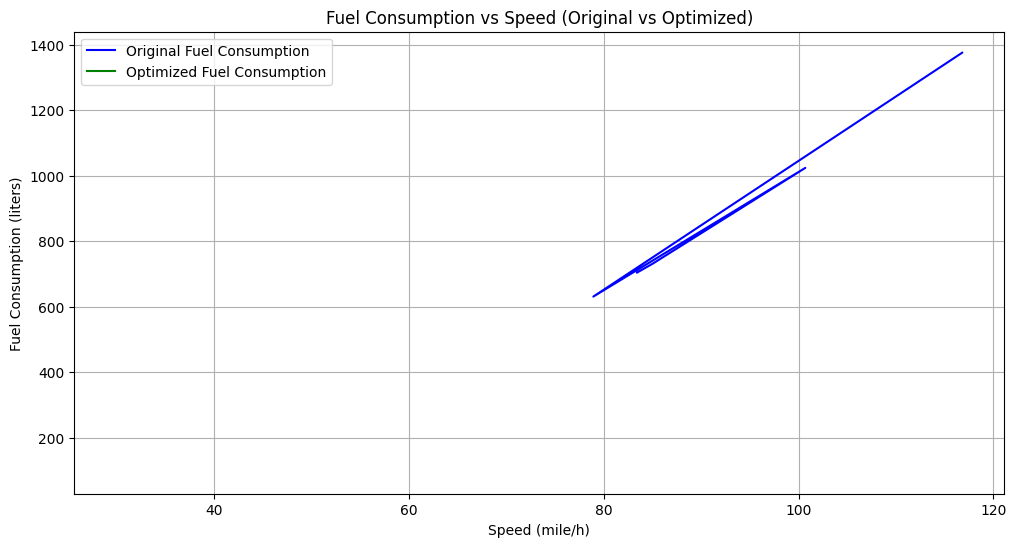

In [141]:


# Objective function: sum of fuel consumption for all vehicles
def objective(speeds):
    return np.sum(fuel_consumption(speeds))

# Constraints: Speed limits for all vehicles
V_min = 30  # Minimum speed limit 
V_max = 120  # Maximum speed limit

# Initialize speeds for vehicles
speeds = np.random.uniform(V_min, V_max, 5)

# Define bounds for each vehicle's speed
bounds = [(V_min, V_max) for _ in speeds]

# Initial guess (starting with the given speeds)
initial_guess = speeds

# Perform the optimization
result = minimize(objective, initial_guess, bounds=bounds, method='SLSQP')

# Optimized speeds
optimized_speeds = result.x

# Calculate fuel consumption with optimized speeds
optimized_consumption = fuel_consumption(optimized_speeds)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(speeds, fuel_consumption(speeds), 'b', label='Original Fuel Consumption')
plt.plot(optimized_speeds, optimized_consumption, 'g', label='Optimized Fuel Consumption')
plt.xlabel('Speed (mile/h)')
plt.ylabel('Fuel Consumption (liters)')
plt.title('Fuel Consumption vs Speed (Original vs Optimized)')
plt.grid(True)
plt.legend()
plt.show()

Develop the code above by adding Genetic Algorithm

Best solutions found (chromosomes): 
 [[119.93646418  10.0136411   10.03973942]
 [119.93646418  10.0136411   10.03973942]
 [119.93646418  10.0136411   10.03973942]
 [119.93646418  10.0136411   10.03973942]
 [ 39.40979943  34.00535232  10.03973942]
 [119.93646418  10.0136411   10.03973942]
 [119.93646418  10.0136411   10.03973942]
 [119.93646418  10.0136411   10.03973942]
 [119.93646418  10.0136411   10.03973942]
 [119.93646418  10.0136411   21.70442703]]
Function values (TTT, FC) for each solution: 
 [[2426.68089216   21.38157865]
 [2426.68089216   21.38157865]
 [2426.68089216   21.38157865]
 [2426.68089216   21.38157865]
 [2426.68089216   21.38157865]
 [2426.68089216   21.38157865]
 [2426.68089216   21.38157865]
 [2426.68089216   21.38157865]
 [2426.68089216   21.38157865]
 [2426.68089216   21.38157865]]


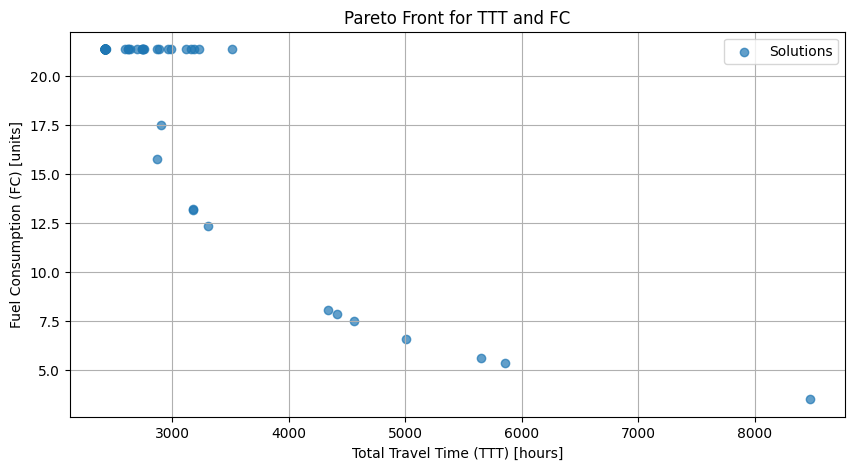

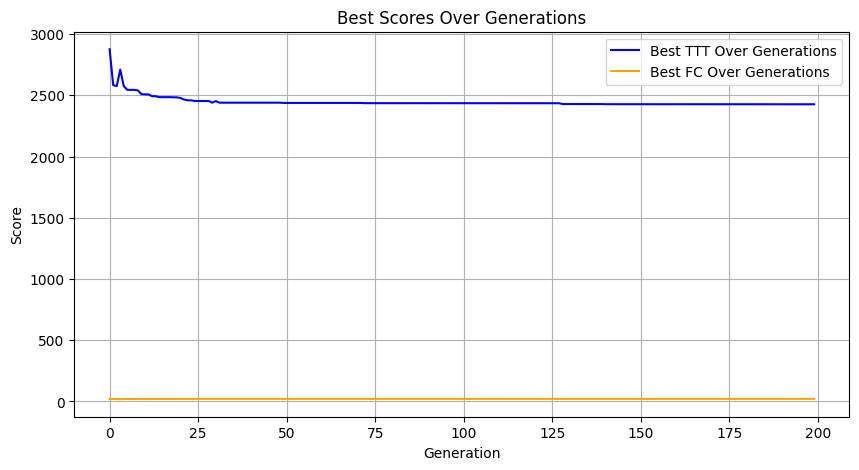

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Extract travel times and speeds, ensuring they are numeric
travel_times = pd.to_numeric(Average_Speed_of_Vehicle_Traveled_Between_End_Points_data['travel_time'], errors='coerce').values
speeds = pd.to_numeric(Average_Speed_of_Vehicle_Traveled_Between_End_Points_data['speed'], errors='coerce').values

# Remove any NaN values if they exist
valid_indices = ~np.isnan(travel_times) & ~np.isnan(speeds)
travel_times = travel_times[valid_indices]
speeds = speeds[valid_indices]

# Constants for fuel consumption model
a, b, c = 0.05, 0.001, 1.0

# Constraints for speed limits and signal timings
V_min, V_max = 30, 120  # Speed limits in km/h
green_min, green_max = 10, 60  # Green light duration in seconds
yellow_duration = 3  # Yellow light duration in seconds
red_min, red_max = 10, 60  # Red light duration in seconds

# Genetic Algorithm parameters
POP_SIZE = 100
N_GENERATIONS = 200
MUTATION_RATE = 0.1
CROSSOVER_RATE = 0.9

# Initialize population
def initialize_population(pop_size, n_var):
    # Each individual will have the format [speed, green_light, red_light]
    return np.random.uniform(low=[V_min, green_min, red_min], 
                              high=[V_max, green_max, red_max], 
                              size=(pop_size, n_var))

# Objective functions
def objective_functions(variables):
    speed = variables[0]
    green_light = variables[1]
    red_light = variables[2]
    
    # Total Travel Time (TTT) calculation
    travel_time = np.sum(travel_times) / speed + (green_light + red_light) * len(travel_times) / 60  # Convert to hours
    
    # Fuel Consumption (FC) calculation
    fuel_consumption = a * speed + b * speed**2 + c
    
    return np.array([travel_time, fuel_consumption])

# Evaluate population
def evaluate_population(population):
    return np.array([objective_functions(ind) for ind in population])

# Tournament selection
def tournament_selection(population, scores, tournament_size=3):
    selected = []
    for _ in range(len(population)):
        indices = np.random.choice(len(population), tournament_size)
        selected.append(population[indices[np.argmin(scores[indices, 0])]])  # Minimize TTT
    return np.array(selected)

# Crossover
def crossover(parent1, parent2):
    if np.random.rand() < CROSSOVER_RATE:
        point = np.random.randint(1, len(parent1)-1)
        child1 = np.concatenate((parent1[:point], parent2[point:]))
        child2 = np.concatenate((parent2[:point], parent1[point:]))
        return child1, child2
    return parent1.copy(), parent2.copy()

# Mutation
def mutate(variables):
    for i in range(len(variables)):
        if np.random.rand() < MUTATION_RATE:
            if i == 0:  # Speed variable
                variables[i] = np.random.uniform(V_min, V_max)
            elif i == 1:  # Green light variable
                variables[i] = np.random.uniform(green_min, green_max)
            elif i == 2:  # Red light variable
                variables[i] = np.random.uniform(red_min, red_max)
    return variables

# Main genetic algorithm
def genetic_algorithm():
    n_var = 3  # Number of variables: speed, green light, red light
    population = initialize_population(POP_SIZE, n_var)
    
    # Store the best scores over generations for visualization
    best_scores_over_time = []
    
    for generation in range(N_GENERATIONS):
        scores = evaluate_population(population)
        
        # Sort by total travel time, then fuel consumption
        sorted_indices = np.argsort(scores[:, 0])
        population = population[sorted_indices]
        scores = scores[sorted_indices]
        
        # Store the best score of this generation
        best_scores_over_time.append(scores[0])
        
        # Create next generation
        selected = tournament_selection(population, scores)
        next_generation = []
        
        for i in range(0, len(selected), 2):
            if i + 1 < len(selected):
                children = crossover(selected[i], selected[i + 1])
                next_generation.extend(children)
            else:
                next_generation.append(selected[i])
        
        population = np.array([mutate(ind) for ind in next_generation])
        
    return population, scores, best_scores_over_time

# Run the genetic algorithm
final_population, final_scores, best_scores_over_time = genetic_algorithm()

# Output the best solutions
best_indices = np.argsort(final_scores[:, 0])
best_solutions = final_population[best_indices][:10]
best_scores = final_scores[best_indices][:10]

print("Best solutions found (chromosomes): \n", best_solutions)
print("Function values (TTT, FC) for each solution: \n", best_scores)

# Plot the Pareto front (Trade-off between TTT and FC)
plt.figure(figsize=(10, 5))
plt.scatter(final_scores[:, 0], final_scores[:, 1], label="Solutions", alpha=0.7)
plt.xlabel("Total Travel Time (TTT) [hours]")
plt.ylabel("Fuel Consumption (FC) [units]")
plt.title("Pareto Front for TTT and FC")
plt.legend()
plt.grid(True) 
plt.show()

# Plot the best scores over generations
best_scores_over_time = np.array(best_scores_over_time)
plt.figure(figsize=(10, 5))
plt.plot(best_scores_over_time[:, 0], label='Best TTT Over Generations', color='blue')
plt.plot(best_scores_over_time[:, 1], label='Best FC Over Generations', color='orange')
plt.xlabel("Generation")
plt.ylabel("Score")
plt.title("Best Scores Over Generations")
plt.legend()
plt.grid(True)
plt.show()


Develop the code above using NSGA-II algorithm

n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |      100 |      2 |  0.000000E+00 |  0.000000E+00 |             - |             -
     2 |      200 |      2 |  0.000000E+00 |  0.000000E+00 |  0.0413828126 |         ideal
     3 |      300 |      5 |  0.000000E+00 |  0.000000E+00 |  0.0484164492 |         ideal
     4 |      400 |      7 |  0.000000E+00 |  0.000000E+00 |  0.0487839420 |         ideal
     5 |      500 |     13 |  0.000000E+00 |  0.000000E+00 |  0.0277392565 |         ideal
     6 |      600 |      6 |  0.000000E+00 |  0.000000E+00 |  0.0499869922 |         ideal
     7 |      700 |     15 |  0.000000E+00 |  0.000000E+00 |  0.0081539078 |         ideal
     8 |      800 |     16 |  0.000000E+00 |  0.000000E+00 |  0.0178532798 |         ideal
     9 |      900 |     11 |  0.000000E+00 |  0.000000E+00 |  0.0145089401 |         ideal
    10 |     1000 |     11 |  0.000000E+00 |  0.000000E+00 |  0.0125588208 |         ideal

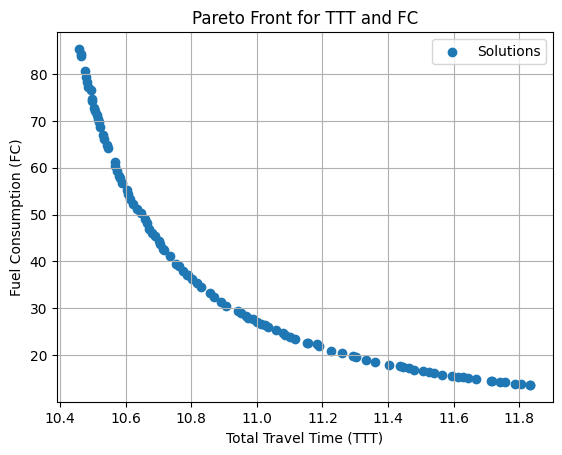

In [142]:
import numpy as np
from pymoo.core.problem import ElementwiseProblem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.termination import get_termination
import matplotlib.pyplot as plt

# Define constants for fuel consumption model
a, b, c = 0.05, 0.001, 1.0

# Constraints for speeds and signal timings
V_min, V_max = 30, 120  # Speed limits in km/h
t_min, t_max = 10, 120  # Signal timings in seconds

# Distances for each vehicle (example)
distances = np.array([10, 15, 12, 18])  # km for each vehicle

# Define the Multi-Objective Problem
class TrafficOptimizationProblem(ElementwiseProblem):
    def __init__(self):
        super().__init__(n_var=len(distances) + 2,  # Speeds for vehicles + 2 signal timings
                         n_obj=2,  # Two objectives: TTT and FC
                         n_constr=4,  # Constraints: Speed and signal timing limits
                         xl=np.concatenate(([V_min] * len(distances), [t_min, t_min])),  # Lower bounds
                         xu=np.concatenate(([V_max] * len(distances), [t_max, t_max])))  # Upper bounds

    def _evaluate(self, variables, out, *args, **kwargs):
        # Extract speeds and signal timings from decision variables
        V = variables[:len(distances)]
        t_s = variables[len(distances):]

        # Objective 1: Total Travel Time (TTT)
        travel_times = distances / V
        avg_signal_delay = np.mean(t_s)
        TTT = np.sum(travel_times) + avg_signal_delay

        # Objective 2: Fuel Consumption (FC)
        FC = np.sum(a * V + b * V**2 + c)

        # Constraints: Speed and signal timing bounds already handled by xl and xu
        out["F"] = [TTT, FC]

        # Constraints are passed as zero if satisfied
        out["G"] = [V_min - np.min(V),  # Ensure speeds are above V_min
                    np.max(V) - V_max,  # Ensure speeds are below V_max
                    t_min - np.min(t_s),  # Ensure timings are above t_min
                    np.max(t_s) - t_max]  # Ensure timings are below t_max

# Define the NSGA-II algorithm
algorithm = NSGA2(pop_size=100)

# Set the termination criterion to 200 generations
termination = get_termination("n_gen", 200)

# Initialize the problem
problem = TrafficOptimizationProblem()

# Perform the optimization
result = minimize(problem, algorithm, termination, seed=1, save_history=True, verbose=True)

# Output the results
print("Best solution found: \n", result.X)
print("Function value: \n", result.F)

# Plot the Pareto front (Trade-off between TTT and FC)
F = result.F
plt.scatter(F[:, 0], F[:, 1], label="Solutions")
plt.xlabel("Total Travel Time (TTT)")
plt.ylabel("Fuel Consumption (FC)")
plt.title("Pareto Front for TTT and FC")
plt.legend()
plt.grid(True)
plt.show()

Best solutions found (chromosomes): 
 [[119.980173    10.00567479  10.04051359]
 [119.980173    10.00567479  10.04051359]
 [119.980173    10.00567479  55.23181812]
 [119.980173    10.00567479  10.04051359]
 [119.980173    10.00567479  58.68297941]
 [119.980173    10.00567479  10.04051359]
 [ 48.08756952  10.00567479  10.04051359]
 [119.980173    10.00567479  10.04051359]
 [119.980173    10.00567479  49.35548946]
 [119.980173    10.00567479  10.04051359]]
Function values (TTT, FC) for each solution: 
 [[2425.79874019   21.39425056]
 [2425.79874019   21.39425056]
 [2425.79874019   21.39425056]
 [2425.79874019   21.39425056]
 [2425.79874019   21.39425056]
 [2425.79874019   21.39425056]
 [2425.79874019   21.39425056]
 [2425.79874019   21.39425056]
 [2425.79874019   21.39425056]
 [2425.79874019   21.39425056]]


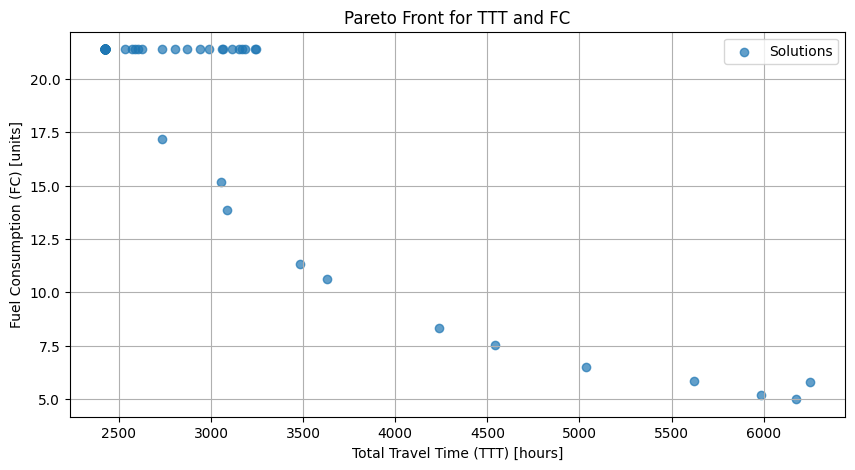

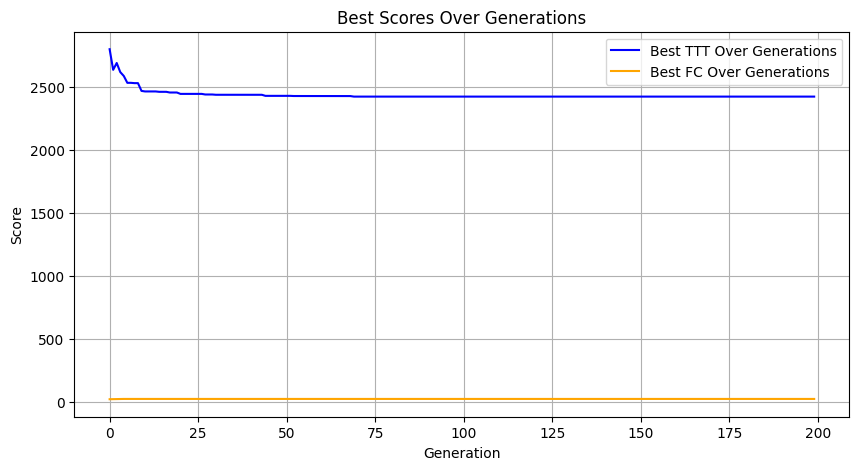